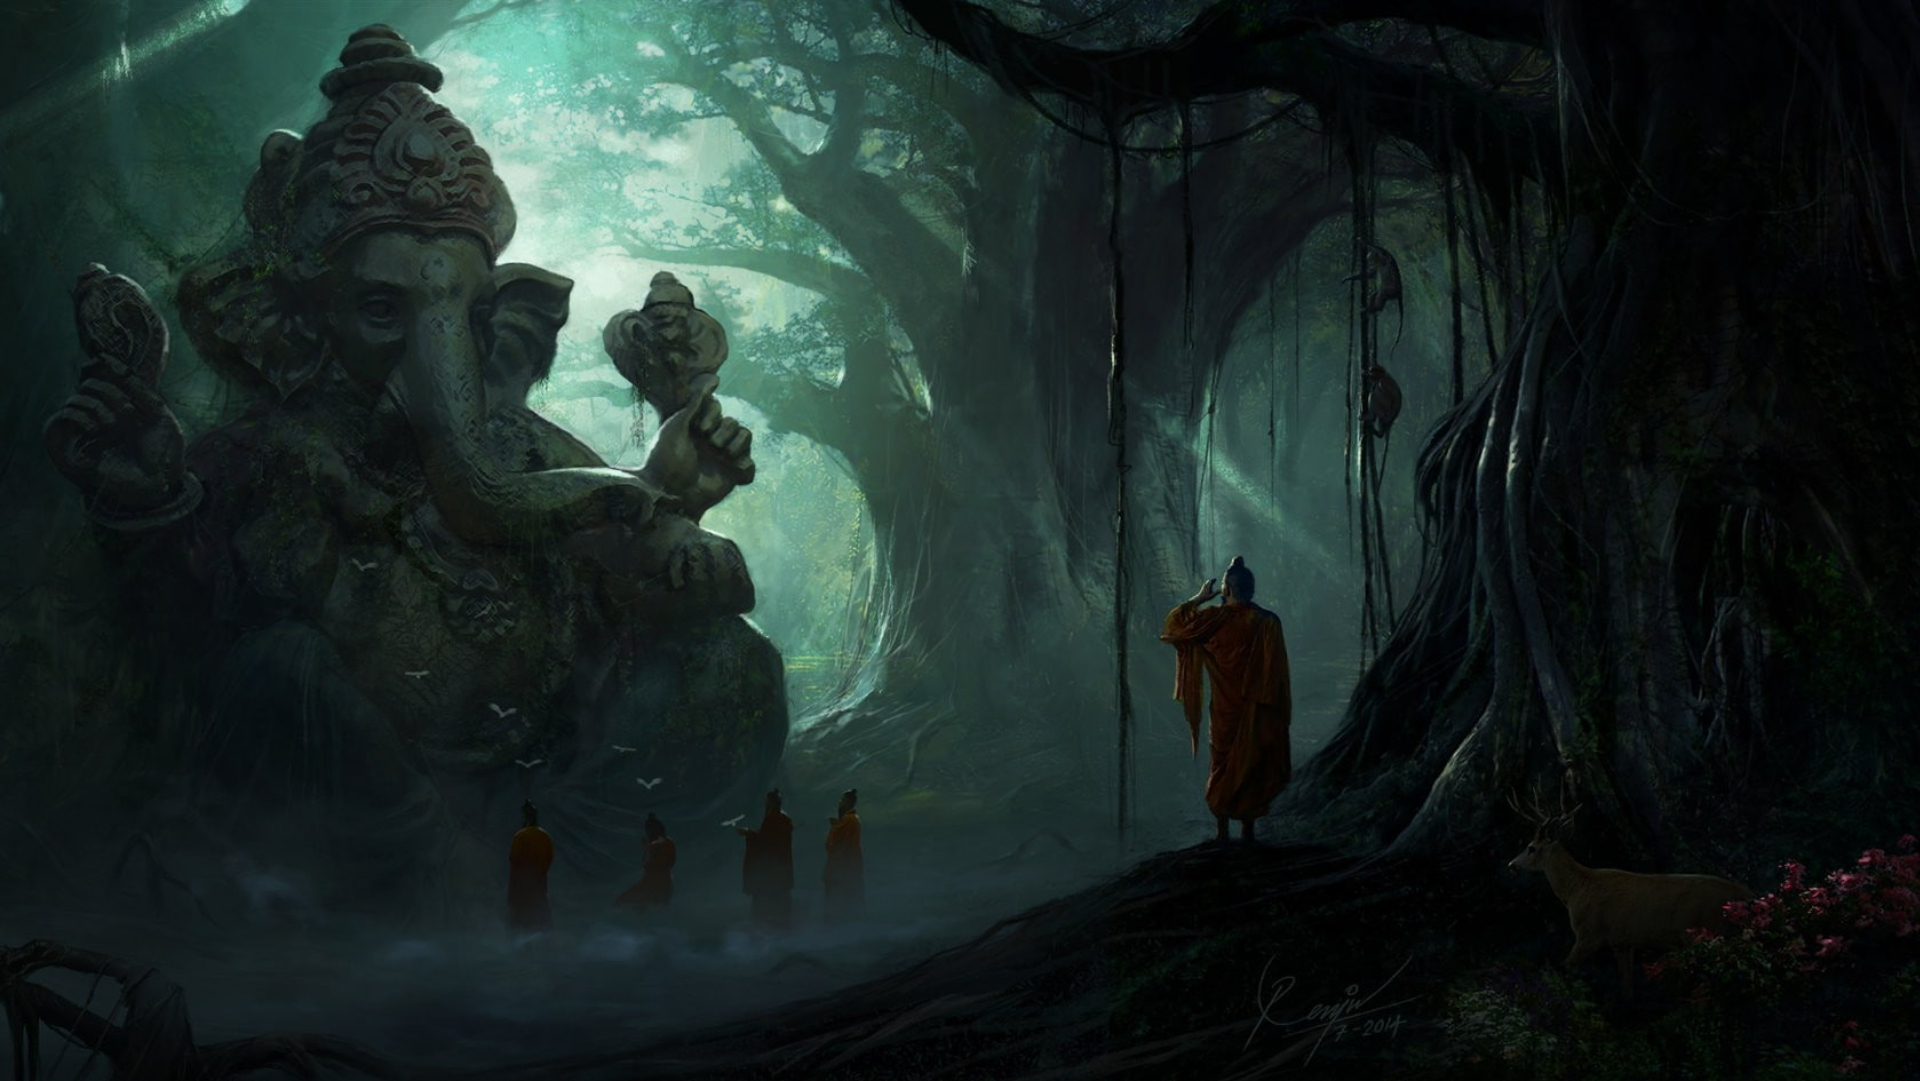

# Principal Components Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
np.c_[data['data'], data['target']][0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01,
       0.000e+00])

In [4]:
cancer = pd.DataFrame(np.c_[data['data'], data['target']], columns = np.append(data['feature_names'],['target']))

df = pd.read_csv('heart.csv')
cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [5]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer['target_names'] = cancer['target'].replace(to_replace=[0,1], value=['malignant','benign'])

In [7]:
cancer.shape

(569, 32)

In [8]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Correlation

In [9]:
cancer.corr()['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

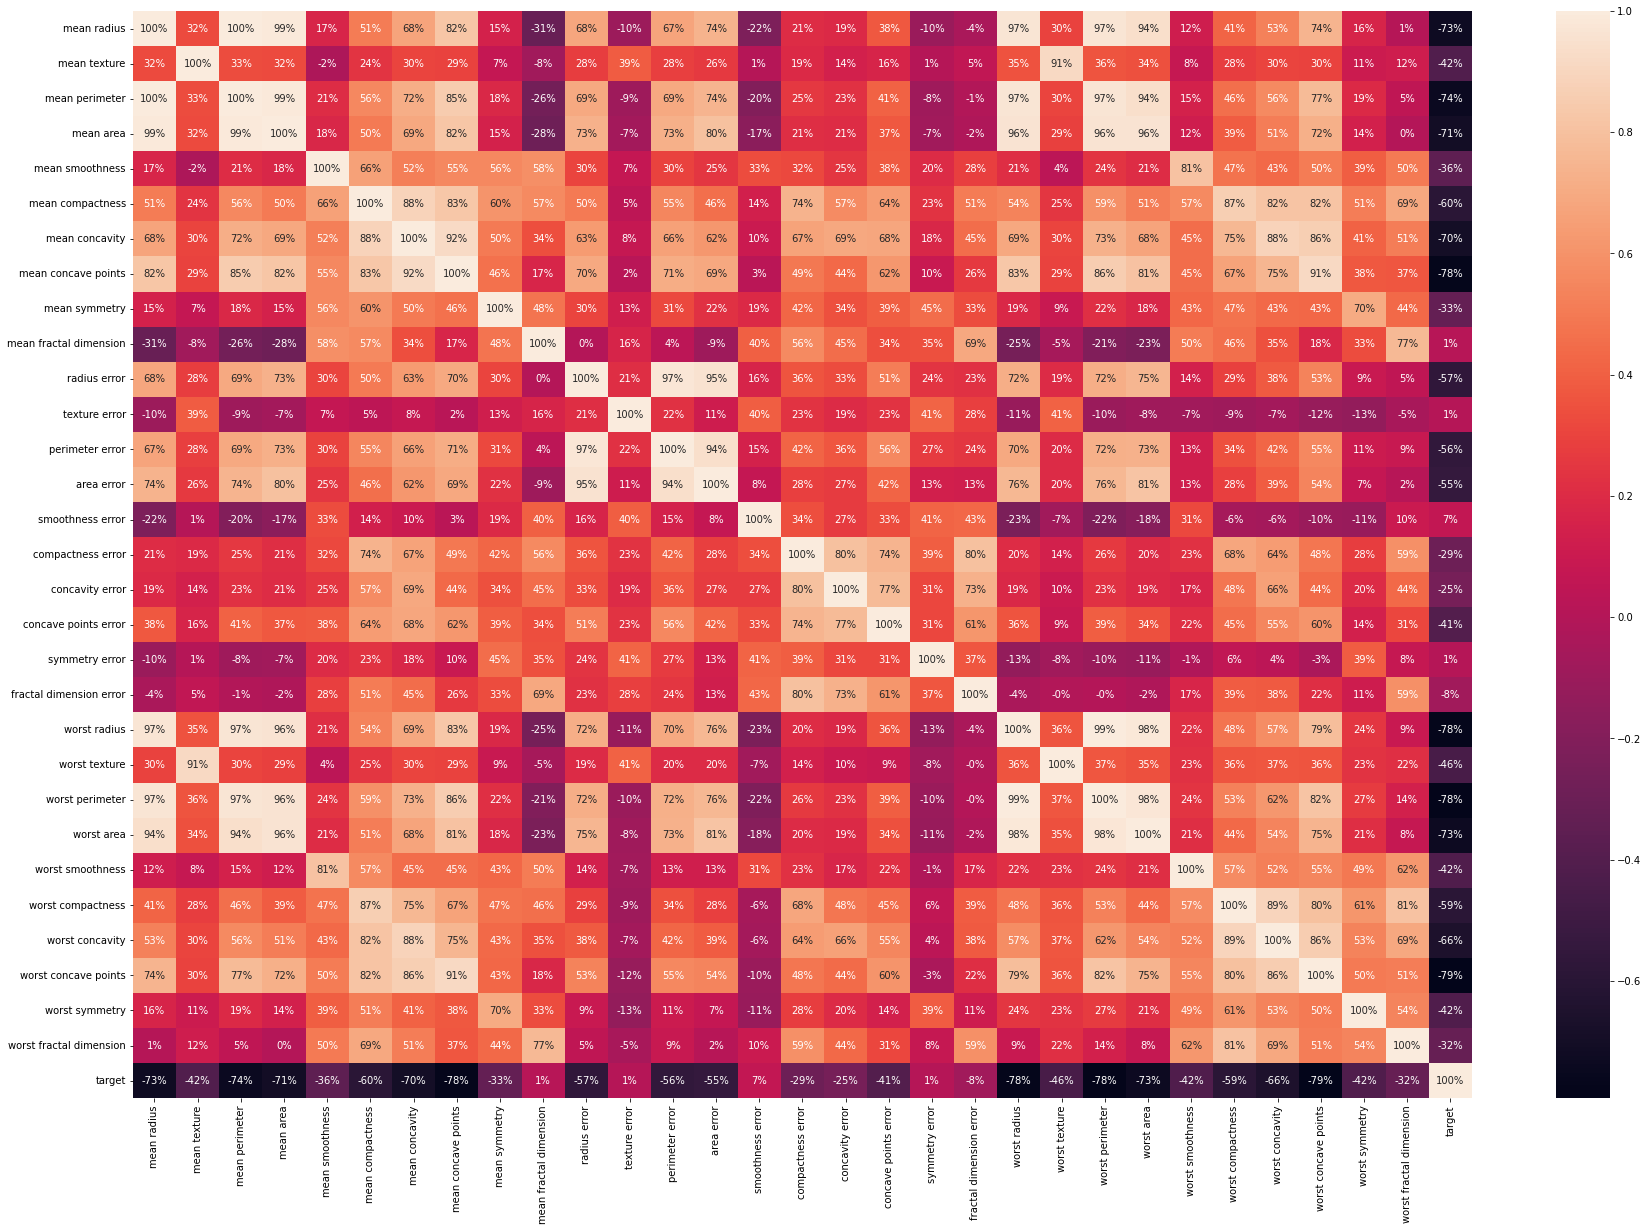

In [10]:
plt.figure(figsize=(30,20))
sns.heatmap(cancer.corr(), annot=True, fmt='.0%')
plt.show()

In [11]:
cancer.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

## Skewness

In [12]:
cancer.skew(numeric_only=True).sort_values(ascending=False)

area error                 5.447186
concavity error            5.110463
fractal dimension error    3.923969
perimeter error            3.443615
radius error               3.088612
smoothness error           2.314450
symmetry error             2.195133
compactness error          1.902221
worst area                 1.859373
worst fractal dimension    1.662579
texture error              1.646444
mean area                  1.645732
worst compactness          1.473555
concave points error       1.444678
worst symmetry             1.433928
mean concavity             1.401180
mean fractal dimension     1.304489
mean compactness           1.190123
mean concave points        1.171180
worst concavity            1.150237
worst perimeter            1.128164
worst radius               1.103115
mean perimeter             0.990650
mean radius                0.942380
mean symmetry              0.725609
mean texture               0.650450
worst texture              0.498321
worst concave points       0

In [13]:
cancer.iloc[:,30]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

## Boxplot

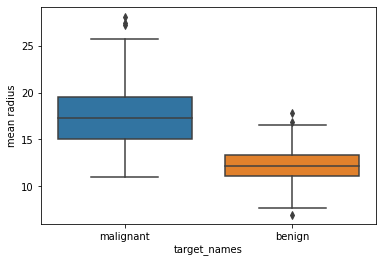

In [14]:
#ax = sns.boxplot(x=Cancer[Cancer.columns[0]])
sns.boxplot(x=cancer[cancer.columns[31]],y=cancer[cancer.columns[0]],data=cancer)
plt.show()

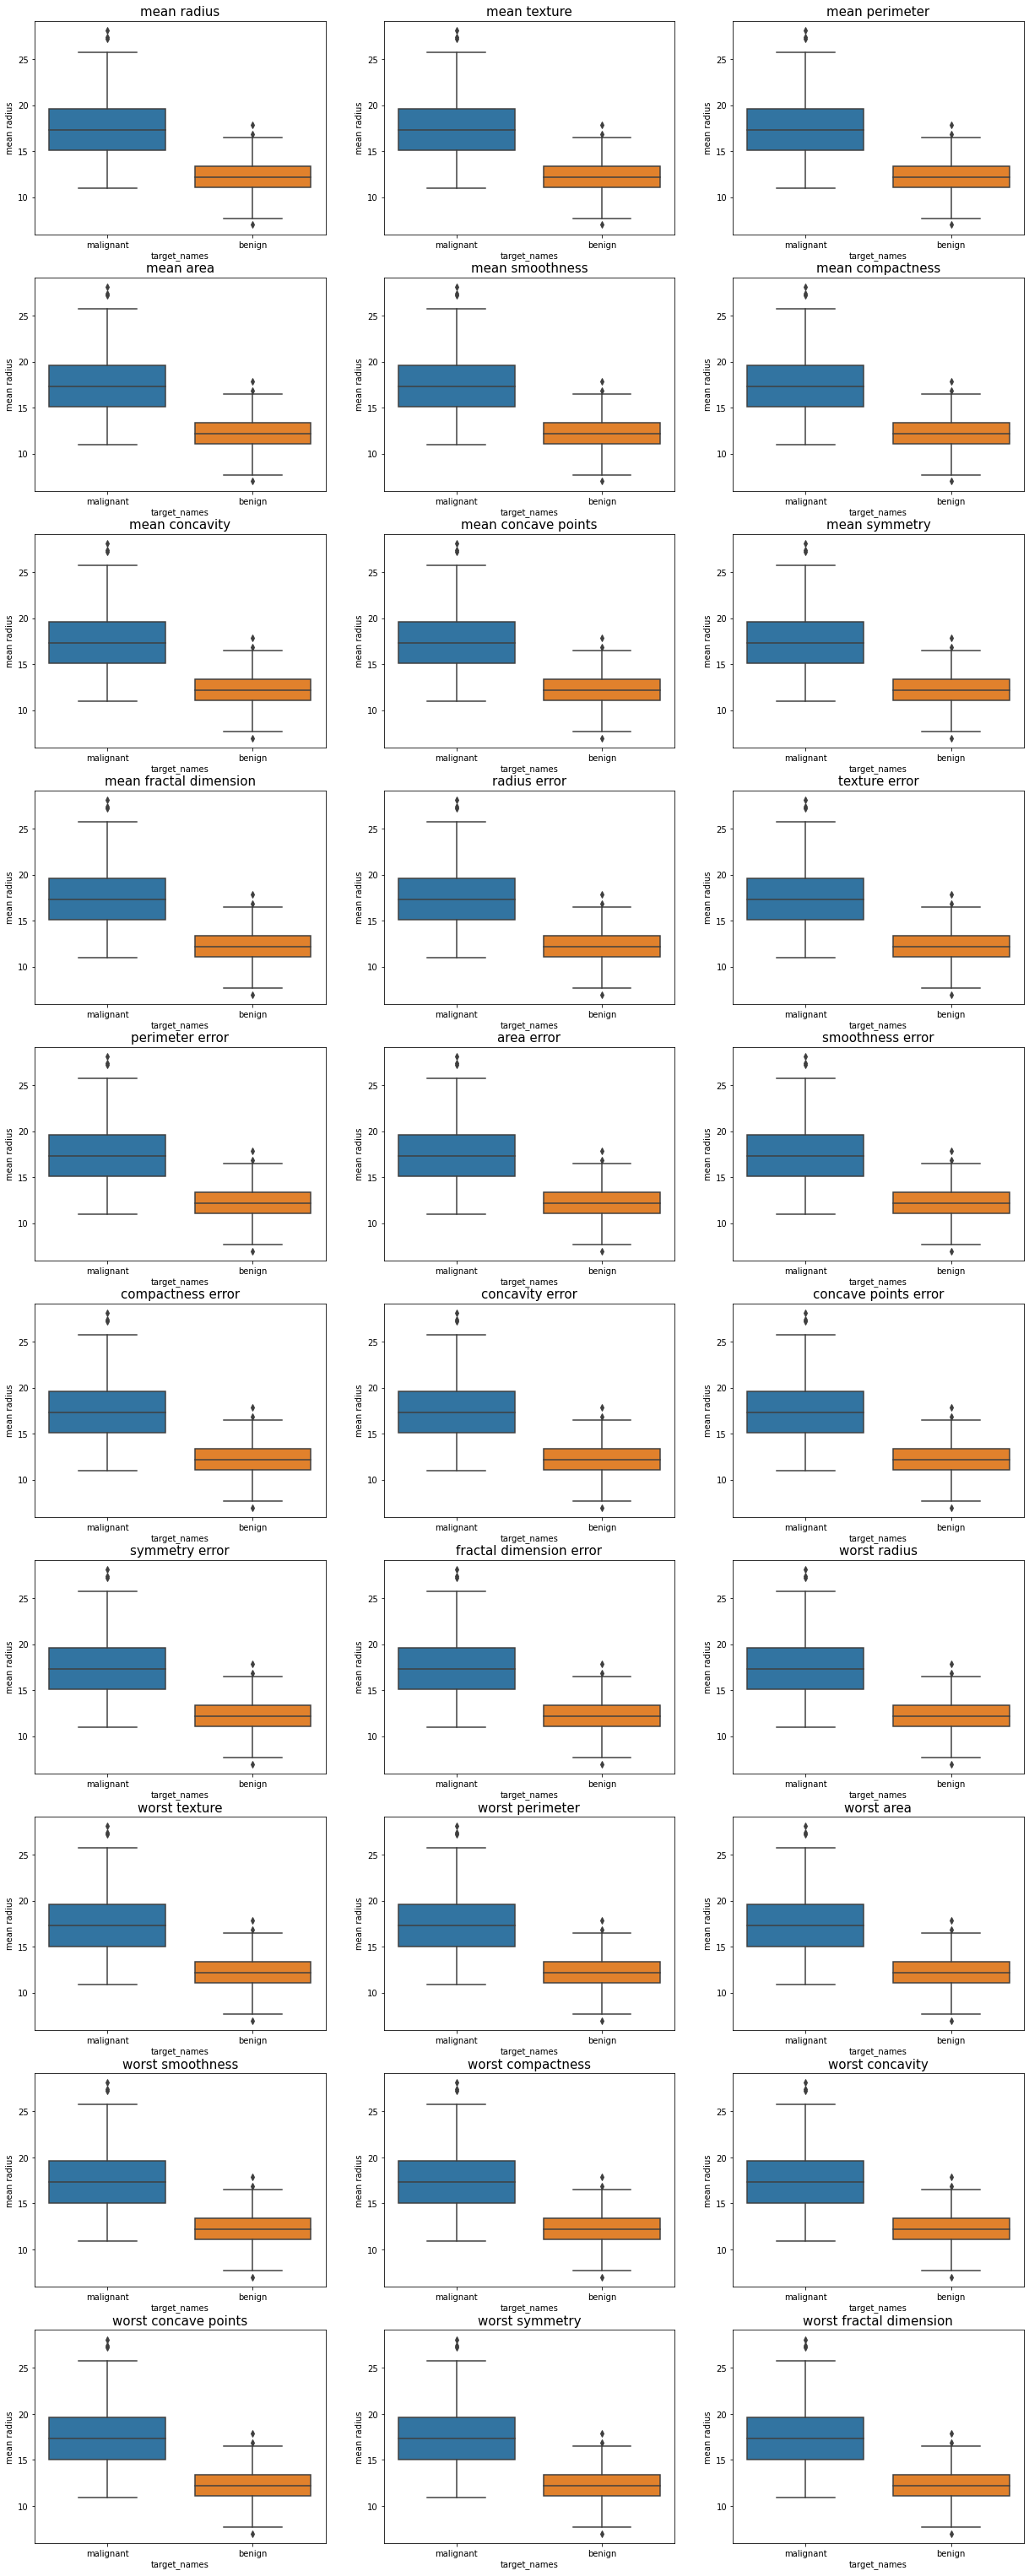

In [15]:
plt.figure(figsize=(21,55))

for i in range(30):
    plt.subplot(10,3,i+1)
    ax = sns.boxplot(x=cancer[cancer.columns[31]],y=cancer[cancer.columns[0]],data=cancer)
    #ax = sns.swarmplot(x=cancer[cancer.columns[31]],y=cancer[cancer.columns[0]],color=".35", data=cancer)
    #ax = sns.swarmplot(y=Cancer[Cancer.columns[i]], color=".30")    
    plt.title(cancer.columns[i], fontsize=15)

plt.show()

# Z Score

In [16]:
from scipy import stats
z = stats.zscore(cancer['mean radius'])
z_abs = np.abs(z)
np.where(z_abs > 3)

(array([ 82, 180, 212, 352, 461], dtype=int64),)

* Lower bound = Q1 - (1.5 * IQR)
* Upper bound = Q3 + (1.5 * IQR)

In [17]:
Q1 = np.percentile(cancer['mean radius'], 20, interpolation = 'midpoint')
Q3 = np.percentile(cancer['mean radius'], 80, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

5.705000000000002

In [18]:
upper_bound = cancer['mean radius'] >= (Q3+1.5*IQR)
lower_bound = cancer['mean radius'] <= (Q1-1.5*IQR)

In [19]:
np.where(upper_bound)

(array([180, 212, 352, 461], dtype=int64),)

In [20]:
np.where(lower_bound)

(array([], dtype=int64),)

In [21]:
upper_points = np.where(upper_bound)
#Cancer.drop(upper_points[0], inplace=True)

In [22]:
for i in range(30):

    z = stats.zscore(cancer[cancer.columns[i]])
    z_abs = np.abs(z)
    #print(Cancer.columns[i], np.where(z_abs > 3))

    print(cancer.columns[i],' : ', np.where(z_abs>3))

mean radius  :  (array([ 82, 180, 212, 352, 461], dtype=int64),)
mean texture  :  (array([219, 232, 239, 259], dtype=int64),)
mean perimeter  :  (array([ 82, 122, 180, 212, 352, 461, 521], dtype=int64),)
mean area  :  (array([ 82, 122, 180, 212, 339, 352, 461, 521], dtype=int64),)
mean smoothness  :  (array([  3, 105, 122, 504, 568], dtype=int64),)
mean compactness  :  (array([  0,   3,  78,  82, 108, 122, 181, 258, 567], dtype=int64),)
mean concavity  :  (array([ 78,  82, 108, 122, 152, 202, 352, 461, 567], dtype=int64),)
mean concave points  :  (array([ 82, 108, 122, 180, 352, 461], dtype=int64),)
mean symmetry  :  (array([ 25,  60,  78, 122, 146], dtype=int64),)
mean fractal dimension  :  (array([  3,  71, 152, 318, 376, 504, 505], dtype=int64),)
radius error  :  (array([122, 138, 212, 258, 417, 461, 503], dtype=int64),)
texture error  :  (array([ 12,  83, 122, 192, 416, 473, 557, 559, 561], dtype=int64),)
perimeter error  :  (array([ 12, 108, 122, 212, 258, 417, 461, 503], dtype=in

In [23]:
from scipy import stats

index = []
k=[]

for i in range(30):

    z = stats.zscore(cancer[cancer.columns[i]])
    z_abs = np.abs(z)
    #print(Cancer.columns[i], np.where(z_abs > 3))
    Q1 = np.percentile(cancer[cancer.columns[i]], 25, interpolation = 'midpoint')
    Q3 = np.percentile(cancer[cancer.columns[i]], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper_bound = cancer[cancer.columns[i]] > (Q3+3*IQR)
    lower_bound = cancer[cancer.columns[i]] <= (Q1-3*IQR)
    
    for j in range(569):
        if upper_bound[j]==True:
            index.append(j)
    for p in range(569):
        if lower_bound[p]==True:
            k.append(p)


    #Cancer.drop(upper_points[0], inplace=True)
    #Cancer.reset_index()
    #print(i, Cancer.shape)
len(set(index)), len(set(k))


(56, 0)

In [24]:
Cancer=cancer

In [25]:
Cancer.drop(np.array(index), inplace=True)
Cancer.shape,cancer.shape

((513, 32), (513, 32))

In [26]:
Cancer.shape

(513, 32)

In [27]:
Cancer.shape

(513, 32)

## After removing the outliers

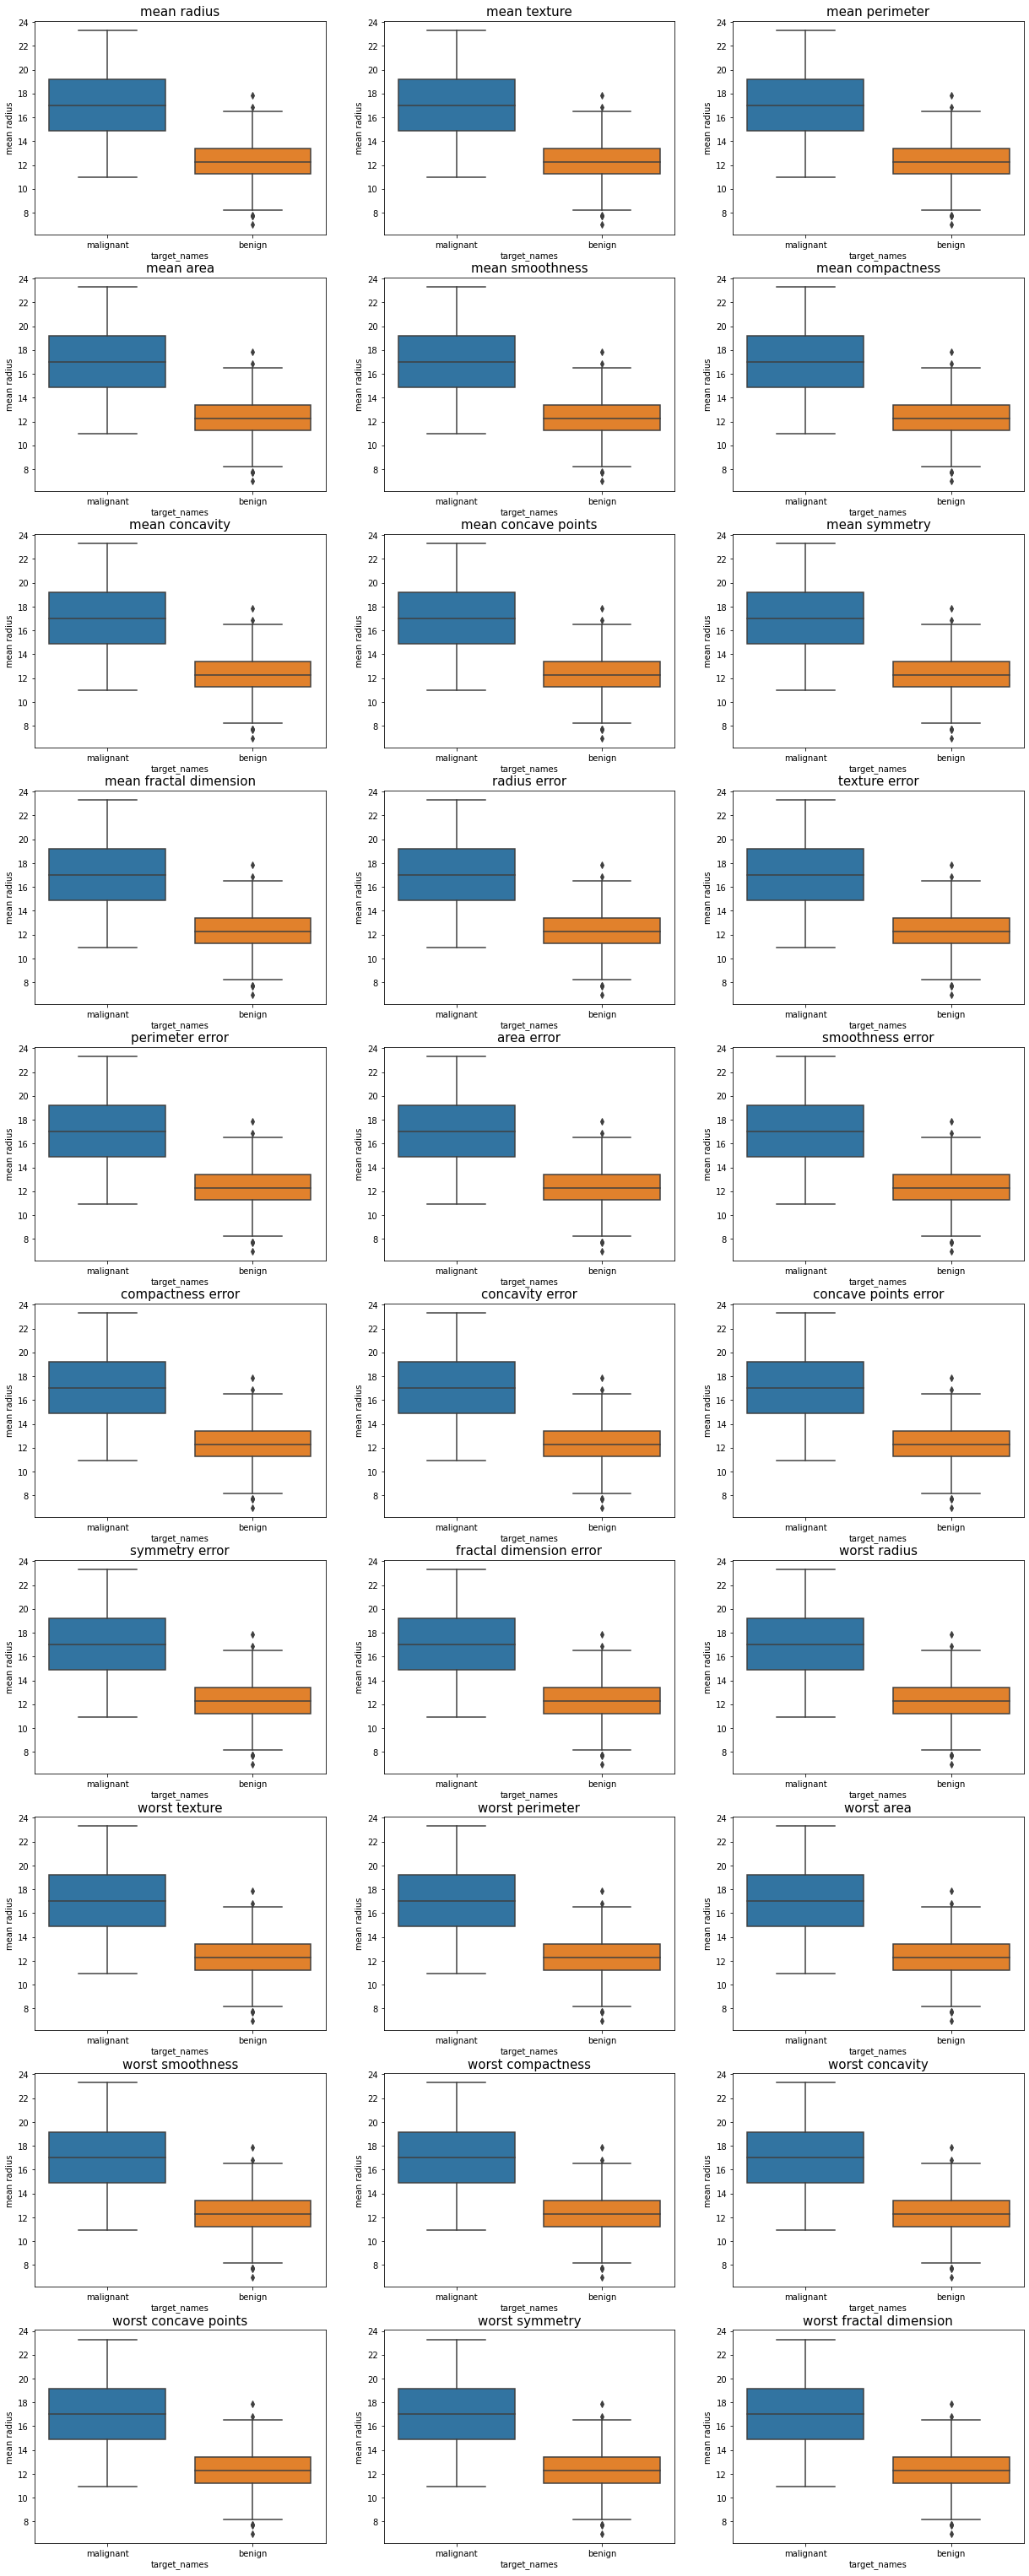

In [28]:
plt.figure(figsize=(21,55))
plt.title('Box Plot', fontsize = 25)
for i in range(30):
    plt.subplot(10,3,i+1)
    ax = sns.boxplot(x=Cancer[Cancer.columns[31]],y=Cancer[Cancer.columns[0]],data=Cancer)
    #ax = sns.swarmplot(x=Cancer[Cancer.columns[31]],y=Cancer[Cancer.columns[0]],color=".35", data=Cancer)   
    plt.title(Cancer.columns[i], fontsize=15)
plt.show()

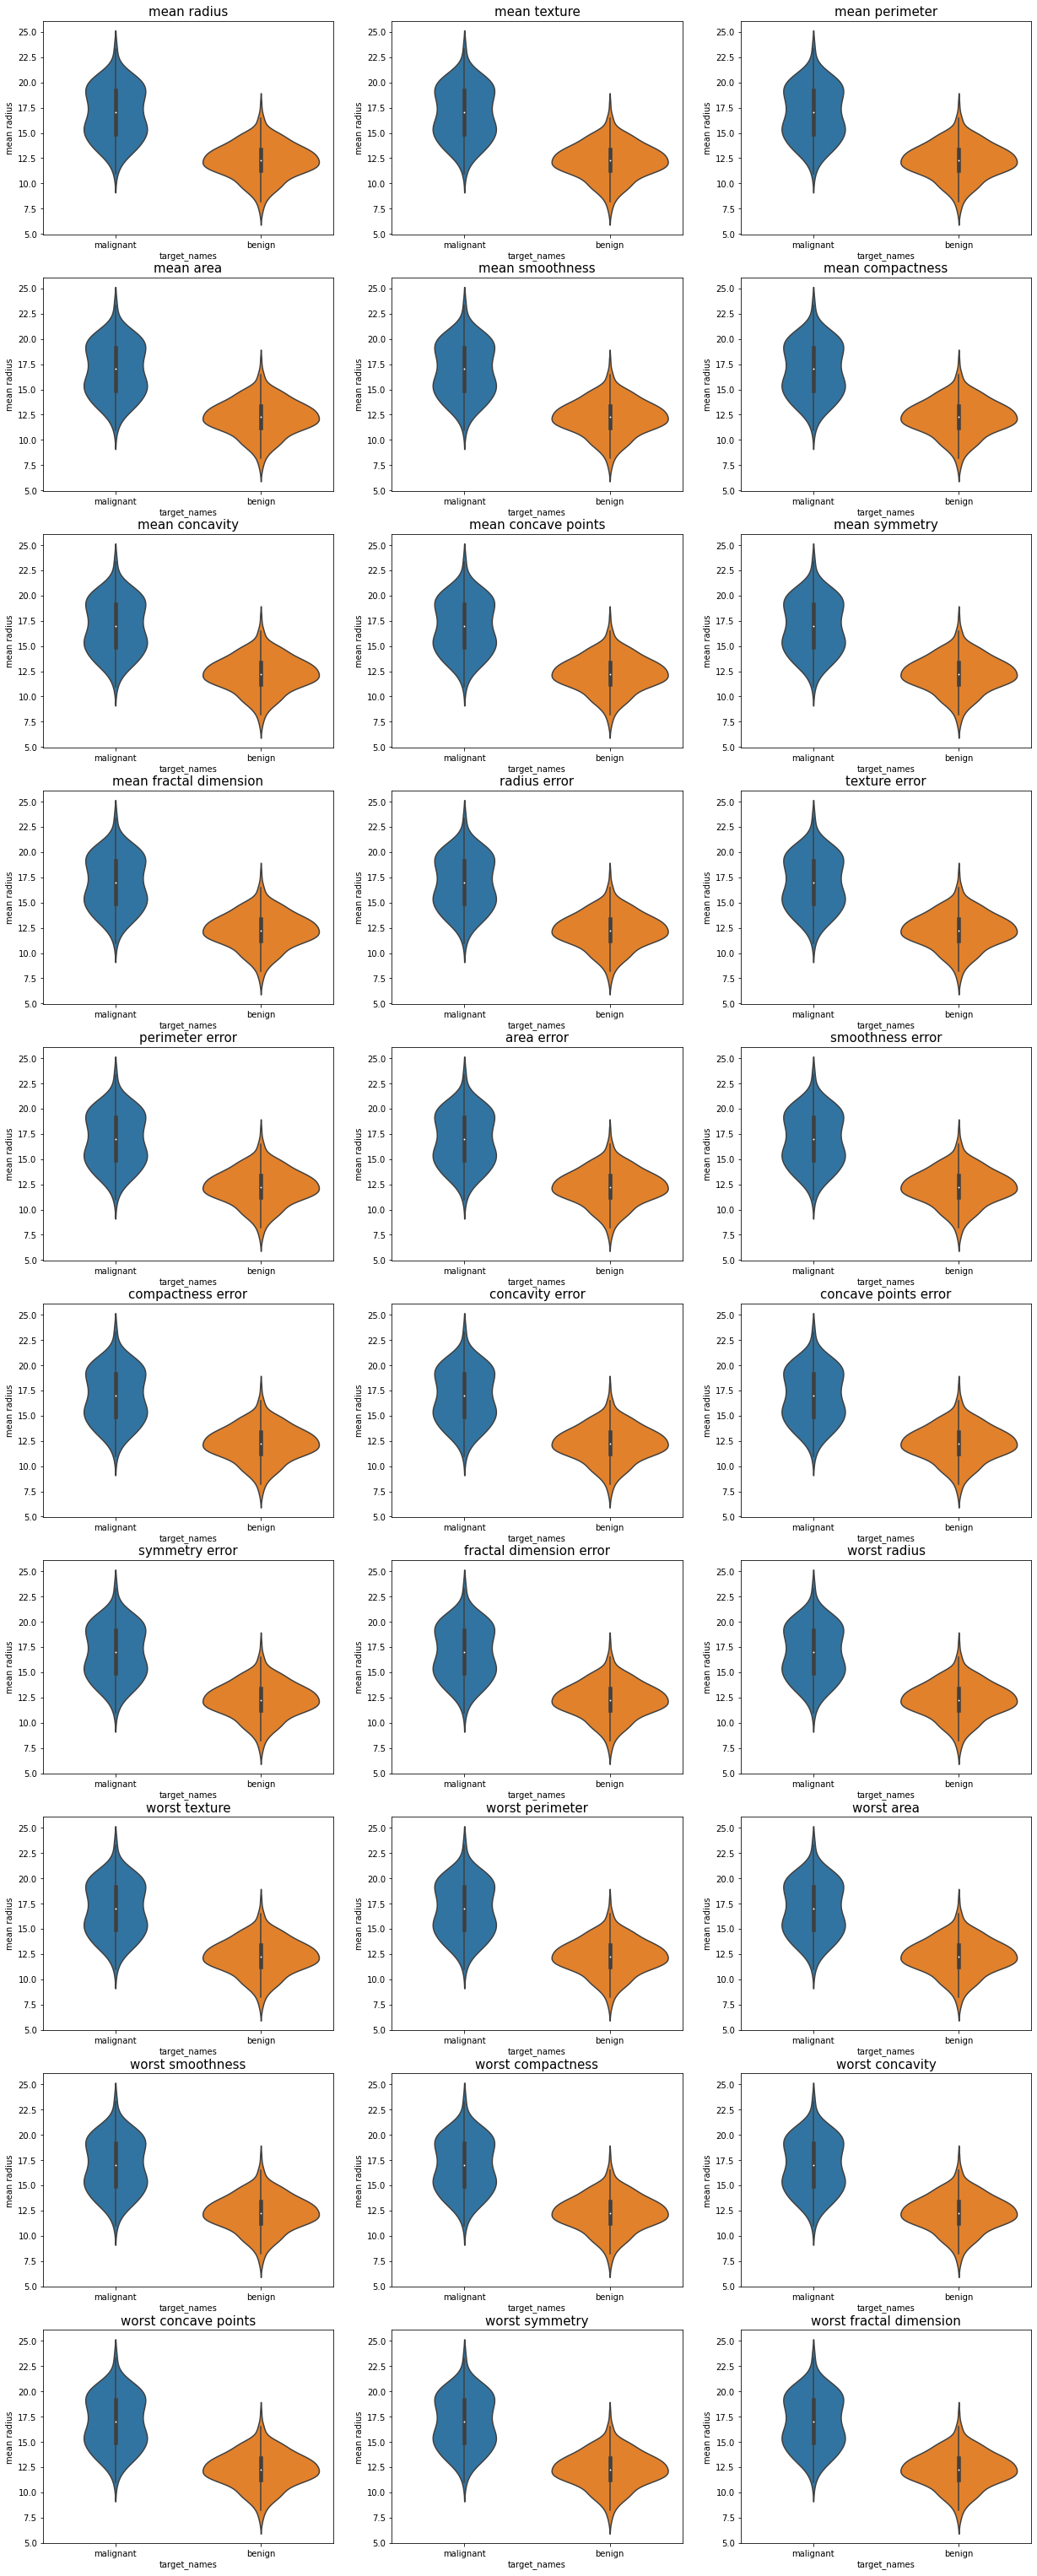

In [29]:
plt.figure(figsize=(21,55))

for i in range(30):
    plt.subplot(10,3,i+1)
    ax = sns.violinplot(x=Cancer[Cancer.columns[31]],y=Cancer[Cancer.columns[0]],data=Cancer)
    #ax = sns.swarmplot(x=Cancer[cancer.columns[31]],y=cancer[Cancer.columns[0]],color=".35", data=cancer)
    #ax = sns.swarmplot(y=Cancer[Cancer.columns[i]], color=".30")    
    plt.title(Cancer.columns[i], fontsize=15)

plt.show()

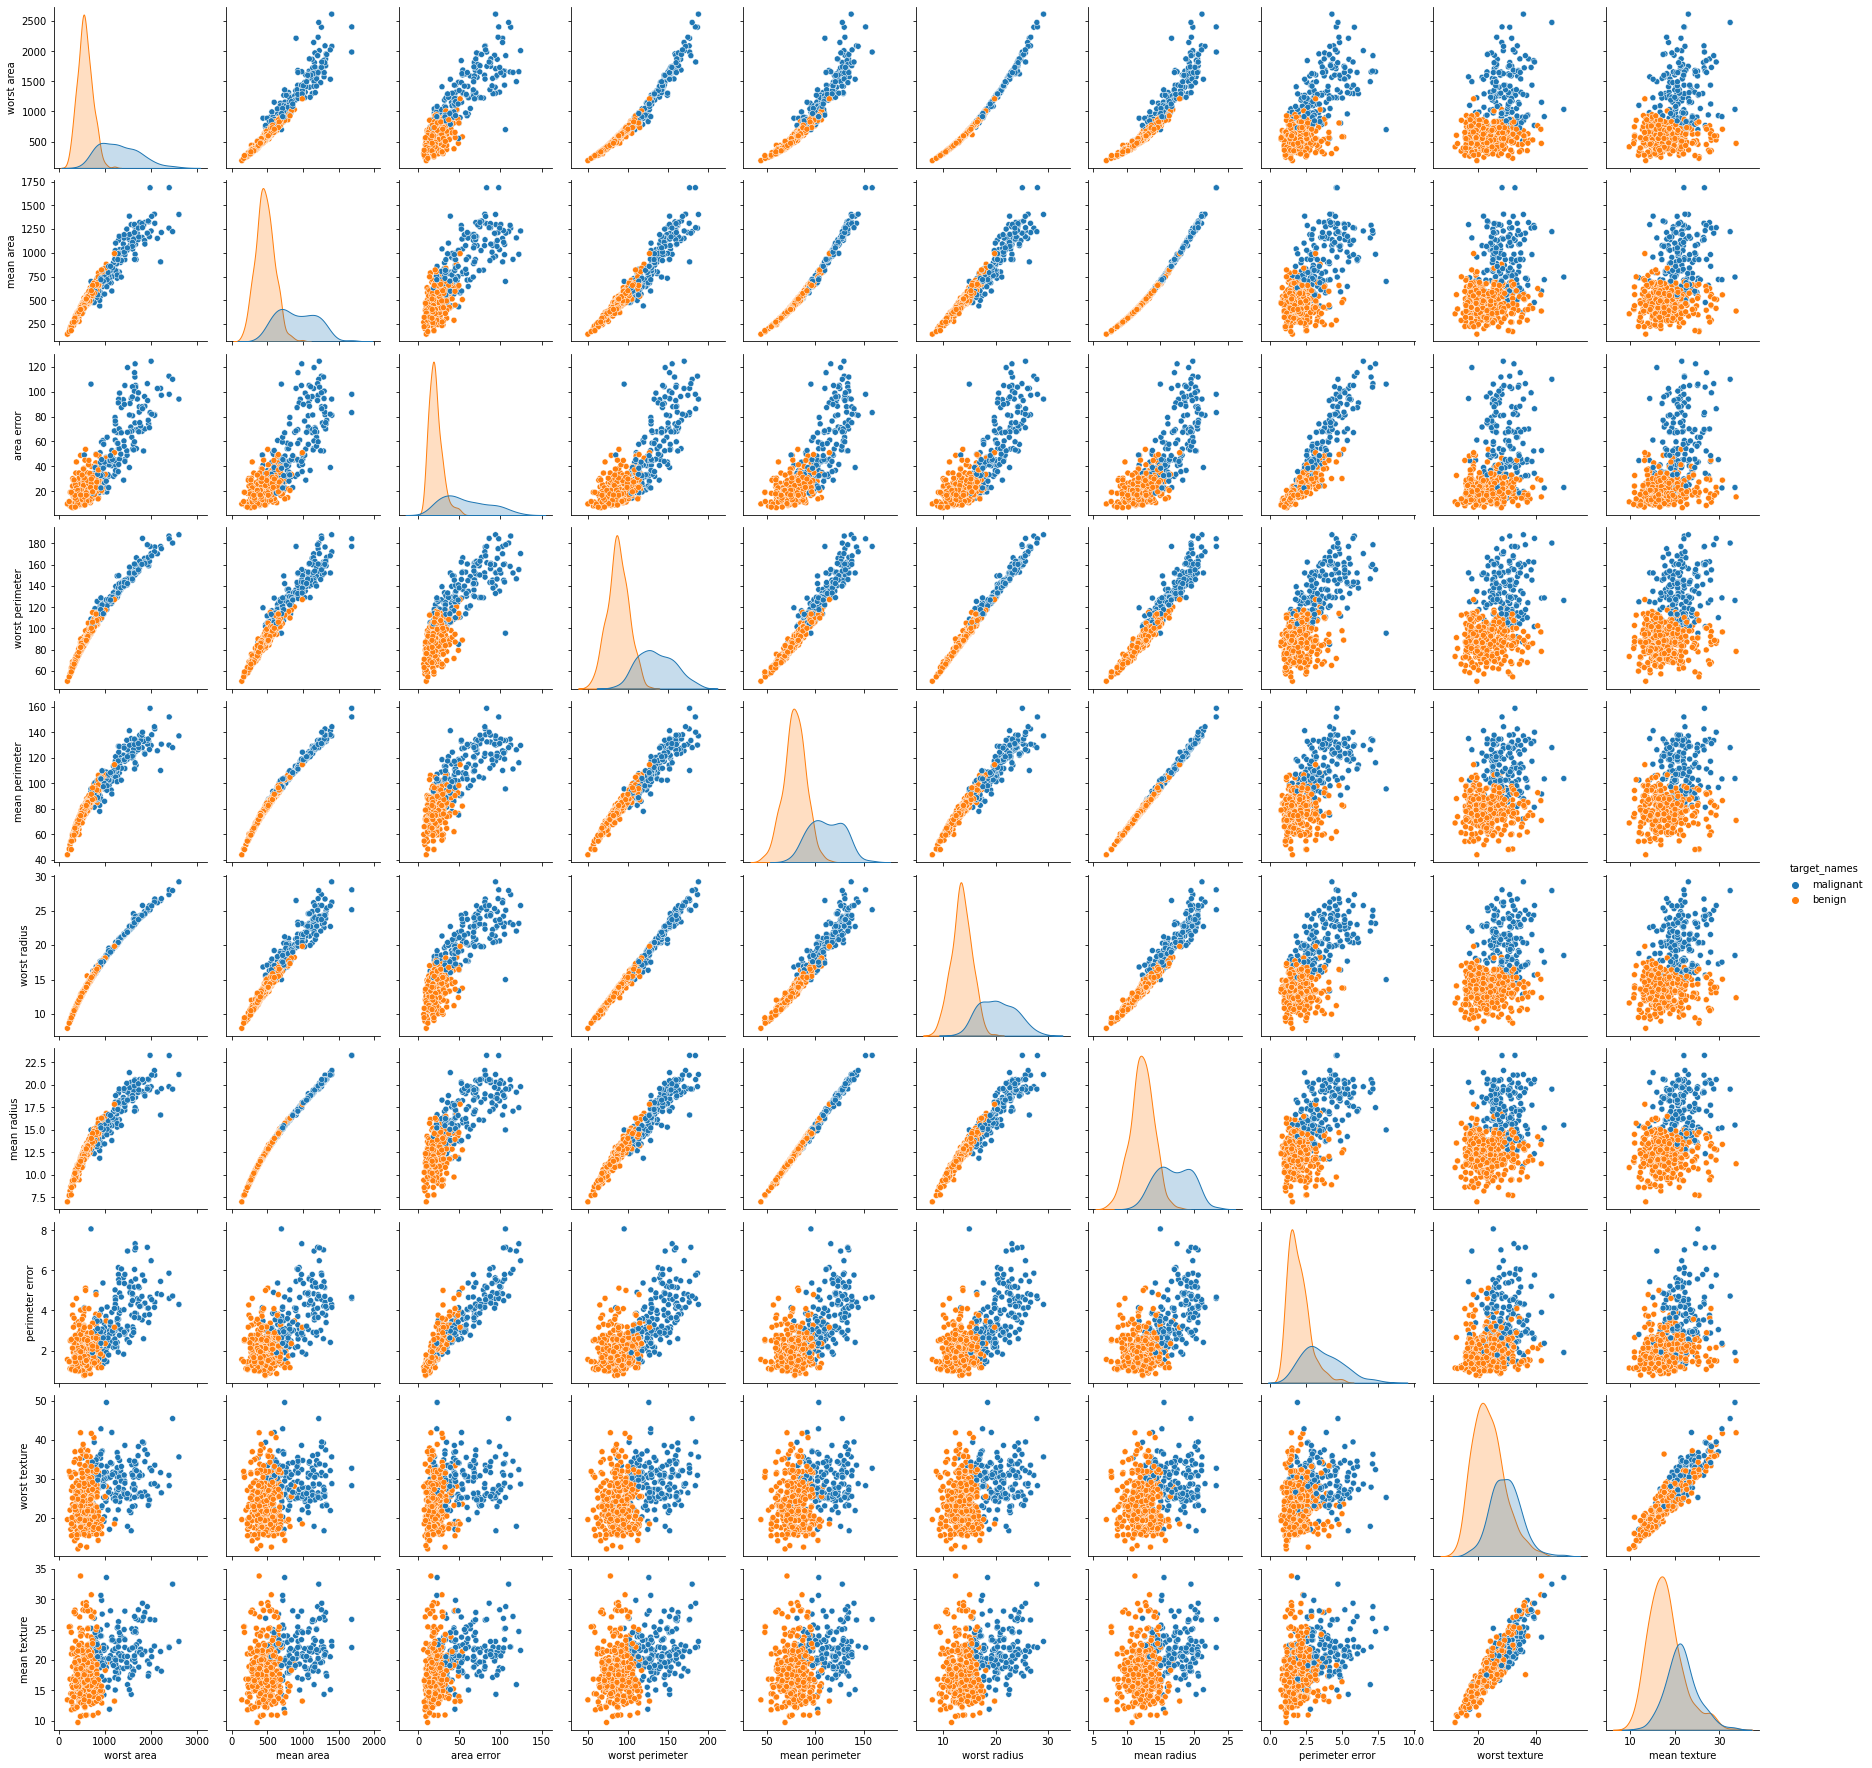

In [30]:
sns.pairplot(Cancer, vars = ['worst area', 'mean area', 'area error', 'worst perimeter',
                             'mean perimeter', 'worst radius', 'mean radius','perimeter error',
                             'worst texture', 'mean texture'], 
             hue ='target_names')
plt.show()

In [31]:
Cancer['target_names'].value_counts()

benign       340
malignant    173
Name: target_names, dtype: int64

In [32]:
X = Cancer.drop(columns= ['target','target_names'],axis='columns')
y = Cancer.target

# Scaling the Data

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.22607023, -0.32242245,  2.08387925, ...,  1.30686705,
        -0.21346267,  0.42289696],
       [ 1.93576969,  0.50874698,  1.94405268, ...,  2.25879191,
         1.42614976,  0.33167552],
       [ 2.13370188, -1.14164978,  2.18995458, ...,  0.9144068 ,
        -0.94682351, -0.35248535],
       ...,
       [ 0.91641894,  2.14003639,  0.89776421, ...,  0.56870777,
        -1.2242087 , -0.26253086],
       [ 2.23596684,  2.43858863,  2.43103488, ...,  2.62620151,
         2.32670167,  2.63881798],
       [-1.99978191,  1.29453646, -2.0135214 , ..., -1.79941409,
         0.01642505, -0.75728052]])

# Seperate Data in Training & Testing

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((410, 30), (103, 30), (410,), (103,))

# Apply Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [38]:
rf.score(X_test, y_test)

0.970873786407767

In [39]:
y_predict= rf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        36
         1.0       0.96      1.00      0.98        67

    accuracy                           0.97       103
   macro avg       0.98      0.96      0.97       103
weighted avg       0.97      0.97      0.97       103



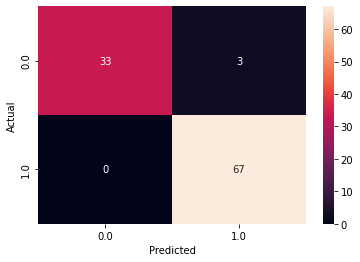

In [41]:
confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# PCA (Principal Components Analysis)

In [42]:
from sklearn.decomposition import PCA
pca = PCA()

In [43]:
pca.fit(X)

PCA()

In [44]:
eigenValues=pca.explained_variance_
eigenValues

array([2.80062021e+05, 4.51068272e+03, 1.55400794e+02, 4.63677579e+01,
       2.87841924e+01, 2.27964488e+00, 1.54864466e+00, 1.47264573e-01,
       8.44270911e-02, 4.89952388e-02, 1.90119682e-02, 4.83729058e-03,
       2.16182248e-03, 1.56201245e-03, 5.61616341e-04, 5.00728651e-04,
       2.08916018e-04, 1.96705250e-04, 1.48300807e-04, 1.02656363e-04,
       6.26465858e-05, 4.83895402e-05, 2.32534778e-05, 1.53549853e-05,
       1.05064726e-05, 7.57040366e-06, 2.58229950e-06, 2.19509990e-06,
       9.87106163e-07, 2.33812485e-07])

In [45]:
ratio= pca.explained_variance_ratio_
ratio

array([9.83338305e-01, 1.58376601e-02, 5.45634689e-04, 1.62803912e-04,
       1.01065467e-04, 8.00416324e-06, 5.43751563e-06, 5.17067238e-07,
       2.96435741e-07, 1.72029377e-07, 6.67537732e-08, 1.69844276e-08,
       7.59047175e-09, 5.48445187e-09, 1.97191629e-09, 1.75813079e-09,
       7.33534387e-10, 6.90660614e-10, 5.20705606e-10, 3.60441353e-10,
       2.19961233e-10, 1.69902682e-10, 8.16463272e-11, 5.39135766e-11,
       3.68897465e-11, 2.65807833e-11, 9.06682743e-12, 7.70731358e-12,
       3.46587266e-12, 8.20949486e-13])

In [46]:
ratio_cum = np.cumsum(ratio)
ratio_cum[2]

0.9997215999517084

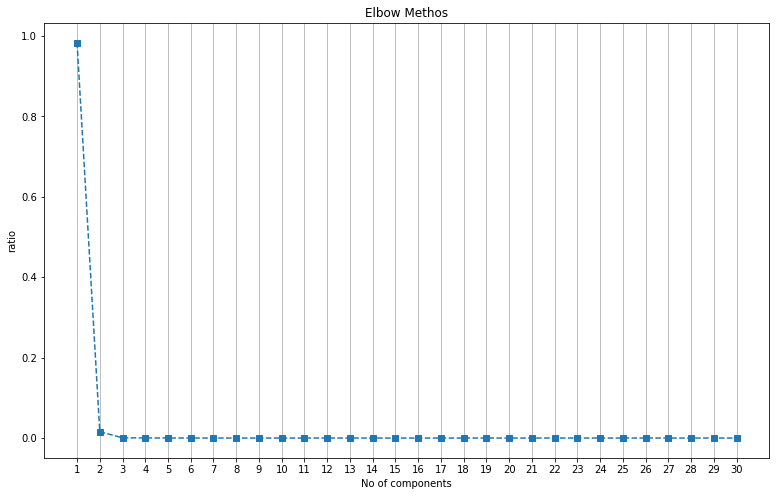

In [47]:
#Elbow Method
plt.figure(figsize=(13,8))
plt.plot(ratio,'s--')
plt.title('Elbow Methos')
plt.xlabel('No of components')
plt.ylabel('ratio')
plt.grid(axis ='x')
plt.xticks(list(range(0,len(ratio))), list(range(1, len(ratio)+1)))
plt.show()

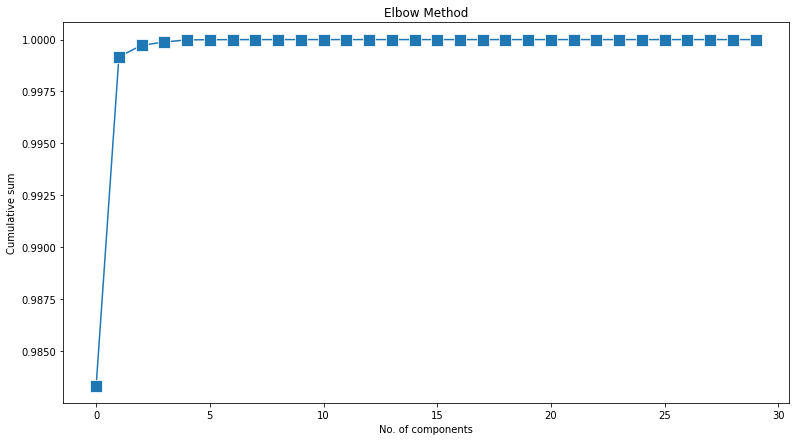

In [48]:
plt.figure(figsize=(13,7))
g=sns.lineplot(data=ratio_cum, marker="s", ms=12)
g.set( xlabel = "No. of components", ylabel = "Cumulative sum")
g.set_title("Elbow Method")
plt.show()

# For 2 components

In [49]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [50]:
X_pca = pca.transform(X)

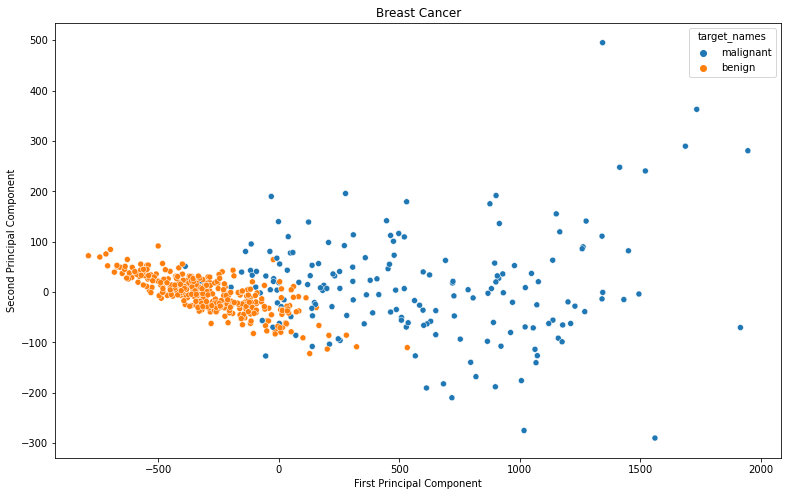

In [51]:
plt.figure(figsize =(13, 8))

g=sns.scatterplot(data=Cancer, x=X_pca[:, 0], y=X_pca[:, 1], hue= 'target_names')
g.set( xlabel = "First Principal Component", ylabel = "Second Principal Component")
g.set_title("Breast Cancer")

plt.show()

In [52]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2)

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=2)

In [54]:
model_rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=2)

In [55]:
model_rf.score(X_test_pca, y_test)

0.9611650485436893

# Accuracy = 96 %

In [56]:
X.shape

(513, 30)

In [57]:
for i in range(1,30):
    pca = PCA(n_components = i)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2)
    model_rf = RandomForestClassifier(random_state=2)
    model_rf.fit(X_train_pca, y_train)
    s=model_rf.score(X_test_pca, y_test)
    print(f'n :{i}, accuracy={round(s,3)}')

n :1, accuracy=0.883
n :2, accuracy=0.961
n :3, accuracy=0.961
n :4, accuracy=0.942
n :5, accuracy=0.951
n :6, accuracy=0.951
n :7, accuracy=0.961
n :8, accuracy=0.951
n :9, accuracy=0.961
n :10, accuracy=0.951
n :11, accuracy=0.951
n :12, accuracy=0.951
n :13, accuracy=0.951
n :14, accuracy=0.951
n :15, accuracy=0.951
n :16, accuracy=0.961
n :17, accuracy=0.951
n :18, accuracy=0.981
n :19, accuracy=0.961
n :20, accuracy=0.951
n :21, accuracy=0.951
n :22, accuracy=0.961
n :23, accuracy=0.961
n :24, accuracy=0.971
n :25, accuracy=0.961
n :26, accuracy=0.961
n :27, accuracy=0.971
n :28, accuracy=0.942
n :29, accuracy=0.942


In [58]:
pca = PCA(n_components = 18)
pca.fit(X)

PCA(n_components=18)

In [59]:
X_pca = pca.transform(X)

In [60]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2)

In [61]:
model_rf = RandomForestClassifier(random_state=2)
model_rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=2)

In [62]:
model_rf.score(X_test_pca, y_test)

0.9805825242718447

In [63]:
y_predict_pca= model_rf.predict(X_test_pca)
y_predict_pca

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1.])

In [64]:
print(classification_report(y_test, y_predict_pca))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        36
         1.0       0.99      0.99      0.99        67

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



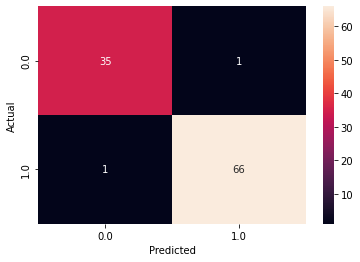

In [65]:
confusion_matrix = pd.crosstab(y_test, y_predict_pca, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Accuracy = 98%